In [2]:
!pip install spacy pyarabic camel-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 23.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.0 MB/s eta 0:00:00
  Created wheel for camel-kenlm: filename=camel_kenlm-2024.5.6-cp310-cp310-linux_x86_64.whl size=3184607 s

In [21]:
import re
import spacy
from pyarabic.araby import strip_tashkeel, normalize_hamza, normalize_ligature
from camel_tools.utils.dediac import dediac_ar

In [22]:
# Load SpaCy models
nlp_en = spacy.load("en_core_web_sm")
nlp_ar = spacy.blank("ar")  # Placeholder model for tokenization and POS tagging

In [23]:
# Define stopwords (load from files or use libraries)
english_stopwords = spacy.lang.en.stop_words.STOP_WORDS
arabic_stopwords = {"هذا", "في", "على", "من", "و", "إلى"}

In [24]:
# Function to remove noise
def remove_noise(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.strip()  # Remove extra spaces
    return text

In [28]:
def normalize_arabic(text):
    """Apply Arabic-specific normalization."""
    text = strip_tashkeel(text)  # Remove diacritics
    text = normalize_hamza(text)  # Normalize Hamza
    text = normalize_ligature(text)  # Normalize ligatures
    text = dediac_ar(text)  # Remove diacritics
    return text

In [42]:
# Preprocessing pipeline
def preprocess_text(text, lang="en"):
    text = remove_noise(text)
    if lang == "ar":
        text = normalize_arabic(text)
        doc = nlp_ar(text)
    else:  # English
        doc = nlp_en(text.lower())

    # Tokenization
    tokens = [token.text for token in doc]

    # Stopword Removal
    if lang == "ar":
        tokens = [token for token in tokens if token not in arabic_stopwords]
    else:
        tokens = [token for token in tokens if token not in english_stopwords]

    # POS Tagging
    pos_tags = [(token.text, token.pos_) for token in doc]

    return {
        "tokens": tokens ,
        "pos_tags": pos_tags,
    }

In [43]:
# Example Usage
english_text = "This is an example of text preprocessing in English."
arabic_text = "هذا مثال على معالجة النصوص باللغة العربية."

preprocessed_en = preprocess_text(english_text, lang="en")
preprocessed_ar = preprocess_text(arabic_text, lang="ar")

print("English:", preprocessed_en)
print("Arabic:", preprocessed_ar)


English: {'tokens': ['example', 'text', 'preprocessing', 'english'], 'pos_tags': [('this', 'PRON'), ('is', 'AUX'), ('an', 'DET'), ('example', 'NOUN'), ('of', 'ADP'), ('text', 'NOUN'), ('preprocessing', 'VERB'), ('in', 'ADP'), ('english', 'PROPN')]}
Arabic: {'tokens': ['مثال', 'معالجة', 'النصوص', 'باللغة', 'العربية'], 'pos_tags': [('هذا', ''), ('مثال', ''), ('على', ''), ('معالجة', ''), ('النصوص', ''), ('باللغة', ''), ('العربية', '')]}


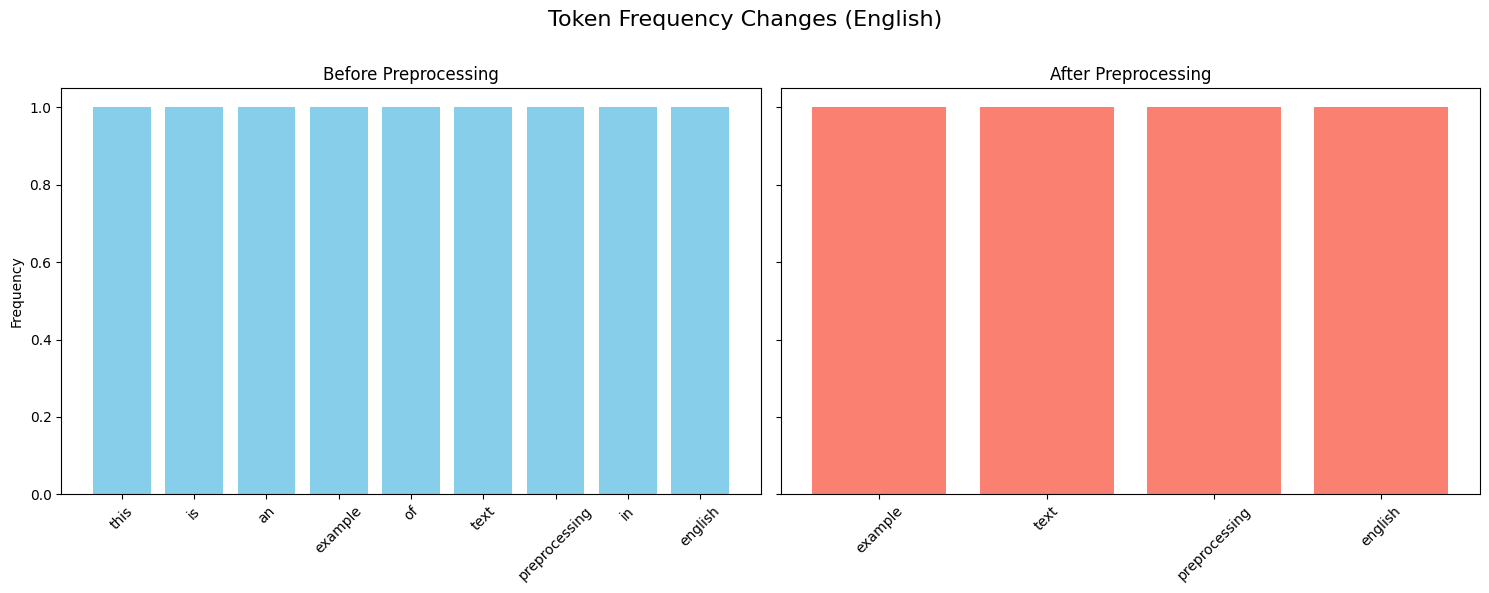

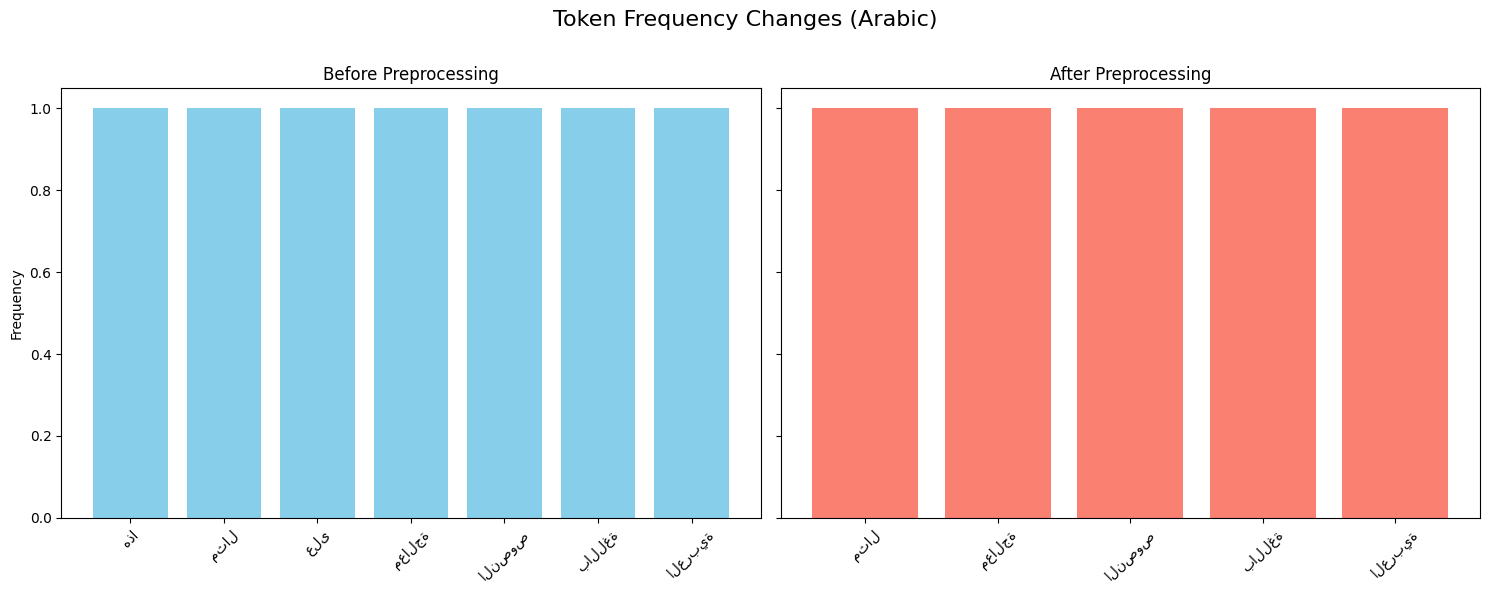

In [33]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_token_changes(tokens_before, tokens_after, lang="en"):
    """
    Visualize token frequency changes before and after preprocessing.
    """
    # Count token frequencies
    before_counts = Counter(tokens_before)
    after_counts = Counter(tokens_after)

    # Get top 10 tokens by frequency
    top_before = before_counts.most_common(10)
    top_after = after_counts.most_common(10)

    # Separate tokens and frequencies for plotting
    tokens_before, freqs_before = zip(*top_before) if top_before else ([], [])
    tokens_after, freqs_after = zip(*top_after) if top_after else ([], [])

    # Create the bar chart
    fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    fig.suptitle(f"Token Frequency Changes ({'Arabic' if lang == 'ar' else 'English'})", fontsize=16)

    # Before Preprocessing
    ax[0].bar(tokens_before, freqs_before, color='skyblue')
    ax[0].set_title("Before Preprocessing")
    ax[0].set_ylabel("Frequency")
    ax[0].tick_params(axis='x', rotation=45)

    # After Preprocessing
    ax[1].bar(tokens_after, freqs_after, color='salmon')
    ax[1].set_title("After Preprocessing")
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Tokenize without preprocessing
def raw_tokenize(text, lang="en"):
    if lang == "ar":
        return [token.text for token in nlp_ar(text)]
    else:
        return [token.text.lower() for token in nlp_en(text)]

# Visualize for English
visualize_token_changes(raw_tokens_en, preprocessed_en["tokens"], lang="en") # Changed processed_en to preprocessed_en

# Visualize for Arabic
visualize_token_changes(raw_tokens_ar, preprocessed_ar["tokens"], lang="ar")
